# ロジスティック写像

$$
f(x, a) = a x (1 - x)
$$

In [1]:
import numpy as np
import pathfollowing as pf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

In [2]:
def func(x, a):
    return np.array([a[0] * x[0] * (1.0 - x[0])])

def dfdx(x,a):
    return np.array([[a[0]*(1.0 - 2*x[0])]])

def dfda(x,a):
    return np.array([x[0]*(1.0 - x[0])])

## 不動点の追跡

- $(x, a) = (2/3, 3)$で周期倍分岐が起こる

In [3]:
x=np.array([0.5])
a=np.array([2.0])
bd,bp,lp,pd=pf.pathfollow(x, a, func, dfdx, dfda,nmax=45, h=0.05, epsr=1.0e-10, epsb=1.0e-10, amin=0.0,amax=4.0,problem='map', quiet=True)

# parameter arrived at boundary


周期倍分岐点

In [4]:
bd[pd[0]]

{'TY': 'P',
 'x': array([0.66666667]),
 'a': array([3.]),
 'v': array([0.10791044, 0.99416062]),
 'udim': 1,
 'phi': array([1., 0.])}

## 周期点の追跡

周期2の周期点の枝に切り替える

In [5]:
v2 = pf.calcSwitchingVectorPD(bd[pd[0]], func, dfdx, dfda, period=2)
x2=bd[pd[0]]['x']
a2=bd[pd[0]]['a']
bd2,bp2,lp2, pd2=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=65, h=0.025, epsr=1.0e-10, epsb=1.0e-10, amin=0.0,amax=4.0,problem='map', quiet=True,period=2)

# parameter arrived at boundary


周期点の周期倍分岐

In [6]:
bd2[pd2[0]]

{'TY': 'P',
 'x': array([0.43996017]),
 'a': array([3.44948974]),
 'v': array([-0.22692635,  0.97391192]),
 'udim': 1,
 'phi': array([1., 0.])}

周期4の周期点の枝に切り替える

In [7]:
v4 = pf.calcSwitchingVectorPD(bd2[pd2[0]], func, dfdx, dfda, period=4)
x4=bd2[pd2[0]]['x']
a4=bd2[pd2[0]]['a']
bd4,bp4,lp4, pd4=pf.pathfollow(x4, a4, func, dfdx, dfda, w=v4, nmax=65, h=0.0125, epsr=1.0e-10, amin=0.0,amax=4.0,epsb=1.0e-12, problem='map', quiet=True,period=4)

# parameter arrived at boundary


周期8の周期点の枝に切り替える

In [8]:
v8 = pf.calcSwitchingVectorPD(bd4[pd4[0]], func, dfdx, dfda, period=8)
x8=bd4[pd4[0]]['x']
a8=bd4[pd4[0]]['a']
bd8,bp8,lp8, pd8=pf.pathfollow(x8, a8, func, dfdx, dfda, w=v8, nmax=130, h=0.00625, epsr=1.0e-10, amin=0.0,amax=4.0,epsb=1.0e-12, problem='map', quiet=True,period=8)

# parameter arrived at boundary


これまでにもとめた周期倍分岐点のパラメータ値$a$

In [9]:
print(bd[pd[0]]['a'], bd2[pd2[0]]['a'], bd4[pd4[0]]['a'], bd8[pd8[0]]['a'])

[3.] [3.44948974] [3.54409036] [3.56440727]


In [10]:
print(pd8)

[7]


In [11]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([bd[m]['x'][0] for m in range(len(bd))])
bd_r2 = np.array([bd2[m]['a'][0] for m in range(len(bd2))])
bd_x2 = np.array([bd2[m]['x'][0] for m in range(len(bd2))])
bd_r4 = np.array([bd4[m]['a'][0] for m in range(len(bd4))])
bd_x4 = np.array([bd4[m]['x'][0] for m in range(len(bd4))])
bd_r8 = np.array([bd8[m]['a'][0] for m in range(len(bd8))])
bd_x8 = np.array([bd8[m]['x'][0] for m in range(len(bd8))])

In [12]:
def f(x,a):
    return a*x*(1-x)

bd_x22 = np.array([f(bd_x2[m], bd_r2[m]) for m in range(len(bd2))])
bd_x42 = np.array([f(bd_x4[m], bd_r4[m]) for m in range(len(bd4))])
bd_x43 = np.array([f(bd_x42[m], bd_r4[m]) for m in range(len(bd4))])
bd_x44 = np.array([f(bd_x43[m], bd_r4[m]) for m in range(len(bd4))])
bd_x82 = np.array([f(bd_x8[m], bd_r8[m]) for m in range(len(bd8))])
bd_x83 = np.array([f(bd_x82[m], bd_r8[m]) for m in range(len(bd8))])
bd_x84 = np.array([f(bd_x83[m], bd_r8[m]) for m in range(len(bd8))])
bd_x85 = np.array([f(bd_x84[m], bd_r8[m]) for m in range(len(bd8))])
bd_x86 = np.array([f(bd_x85[m], bd_r8[m]) for m in range(len(bd8))])
bd_x87 = np.array([f(bd_x86[m], bd_r8[m]) for m in range(len(bd8))])
bd_x88 = np.array([f(bd_x87[m], bd_r8[m]) for m in range(len(bd8))])

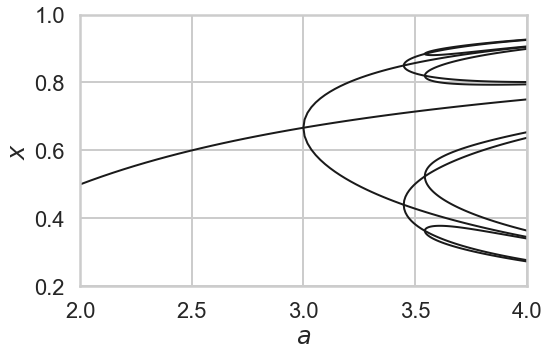

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(2,4)
ax.set_ylim(0.2, 1)
ax.set_xlabel("$a$")
ax.set_ylabel("$x$")
ax.plot(bd_r ,bd_x, '-k')
ax.plot(bd_r2, bd_x2, '-k')
ax.plot(bd_r2, bd_x22, '-k')
ax.plot(bd_r4, bd_x4, '-k')
ax.plot(bd_r4, bd_x42, '-k')
ax.plot(bd_r4, bd_x43, '-k')
ax.plot(bd_r4, bd_x44, '-k')
ax.plot(bd_r8, bd_x8, '-k')
ax.plot(bd_r8, bd_x82, '-k')
ax.plot(bd_r8, bd_x83, '-k')
ax.plot(bd_r8, bd_x84, '-k')
ax.plot(bd_r8, bd_x85, '-k')
ax.plot(bd_r8, bd_x86, '-k')
ax.plot(bd_r8, bd_x87, '-k')
ax.plot(bd_r8, bd_x88, '-k')
# plt.savefig("bd_logistic.pdf", bbox_inches='tight')